In [1]:
import math  
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pathlib
from pathlib import Path

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

df = pd.read_csv('content_es_2020.csv')
df2 = df.drop(columns = ['id', 'group_id', 'enterprise_group_id', 'stream_name', 'group_count', ], axis = 'columns')
df2

,title,summary,url,approval_date_iso8601,approved_by_name,clicks_fb,shares_fb,click_rate_fb,engagement_rate_fb,engagements_fb,clicks_in,shares_in,click_rate_in,engagement_rate_in,engagements_in,clicks_tw,shares_tw,click_rate_tw,engagement_rate_tw,engagements_tw,clicks_xi,shares_xi,click_rate_xi,engagement_rate_xi,engagements_xi,clicks_email,shares_email,click_rate_email,clicks_gp,shares_gp,click_rate_gp,suggested_by_name,image_url,clicks_total,engagements_total,click_rate_avg,engagement_rate_avg,shares_total,sharer_count,sharing_rate,Article Tags
0,"Друзья, поздравляем вас с Новым Годом! https:/...","Друзья, поздравляем вас с Новым Годом! https:/...",https://twitter.com/Kaspersky_ru/status/121226...,2020-01-01T08:52:48Z,NaN,0,1,0.0,0.0,0,0,3,0.0,0.0,0,11,5,2.2,0.0,0,2,1,2.0,0.0,0,0,0,0,0,0,0,NaN,NaN,13,0,1.3,0.0,10,6,0.0488,NaN
1,Social Media Detox: 5 Gründe für eine Pause vo...,Social Media kann sich ernsthaft auf die menta...,https://www.elle.de/social-media-detox,2020-01-02T07:45:09Z,Michael Roesner,0,0,0.0,0.0,0,0,2,0.0,0.0,0,1,1,1.0,1.0,1,2,1,2.0,0.0,0,0,0,0,0,0,0,NaN,https://www.elle.de/sites/default/files/styles...,3,1,0.8,0.3,4,2,0.0377,NaN
2,Ältere mit Technik-Geschenken oft überfordert,Weihnachten ist vorbei und bestimmt gab es wie...,https://www.verivox.de/nachrichten/aeltere-mit...,2020-01-02T07:48:28Z,Michael Roesner,0,0,0.0,0.0,0,0,0,0.0,0.0,0,1,1,1.0,1.0,1,2,1,2.0,0.0,0,0,0,0,0,0,0,NaN,NaN,3,1,1.5,0.5,2,1,0.0189,NaN
3,IT-Geräte in medizinischen Einrichtungen stehe...,2019 waren 19 Prozent aller Computer und Gerät...,https://www.aerzteblatt.de/nachrichten/108264/...,2020-01-02T07:50:16Z,Michael Roesner,0,0,0.0,0.0,0,0,0,0.0,0.0,0,1,1,1.0,1.0,1,2,1,2.0,0.0,0,0,0,0,0,0,0,NaN,https://www.aerzteblatt.de/bilder/cache/00/00/...,3,1,1.5,0.5,2,1,0.0189,NaN
4,Vorsätze für 2020: Fast die Hälfte aller Deuts...,Viele starten ins neue Jahr mit guten Vorsätze...,https://www.kaspersky.de/blog/vorsatze-fur-202...,2020-01-02T12:53:20Z,NaN,0,0,0.0,0.0,0,4,1,4.0,4.0,4,2,1,2.0,1.0,1,2,1,2.0,0.0,0,0,0,0,0,0,0,NaN,https://media.kasperskydaily.com/wp-content/up...,8,5,2.7,1.7,3,2,0.0377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10481,Кто же ты такой?,"Пройди тест и узнай, какая профессия будущего ...",https://event.kaspersky.com/newyear/ru,2020-12-30T16:55:24Z,NaN,0,1,0.0,0.0,0,0,1,0.0,0.0,0,7,3,2.3,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,NaN,https://pbs.twimg.com/media/EqcPkYhXIAINdmv.jpg,7,0,1.4,0.0,5,3,0.0244,NaN
10482,Aschenputtel und die signaturbasierte Erkennung,"Wir untersuchen das Märchen von Cinderella, al...",https://www.kaspersky.de/blog/cinderella-cyber...,2020-12-30T16:55:54Z,NaN,0,0,0.0,0.0,0,0,1,0.0,1.0,1,1,1,1.0,0.0,0,0,1,0.0,0.0,0,0,0,0,0,0,0,NaN,https://media.kasperskydaily.com/wp-content/up...,1,1,0.3,0.3,3,1,0.0189,NaN
10483,Personas están a favor de mejorar su capacidad...,Un nuevo estudio de Kaspersky ha descubierto q...,https://latam.kaspersky.com/blog/personas-esta...,2020-12-30T16:56:44Z,NaN,0,0,0.0,0.0,0,0,1,0.0,2.0,2,3,1,3.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,NaN,https://media.kasperskydaily.com/wp-content/up...,3,2,1.5,1.0,2,1,0.0244,NaN
10484,Did you know that the tale of Cinderella is on...,Did you know that the tale of Cinderella is on...,https://twitter.com/e_kaspersky/status/1344352...,2020-12-30T18:54:42Z,NaN,0,1,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,NaN,https://pbs.twimg.com/media/EqfdXrnW8AAlYH8.jpg,0,0,0.0,0.0,1,1,0.0025,NaN


In [2]:
#описание количества наблюдений, среднее, стандартное отклонение, максимальное и минимальное значения по файлу:
df.describe()

,clicks_fb,shares_fb,click_rate_fb,engagement_rate_fb,engagements_fb,clicks_in,shares_in,click_rate_in,engagement_rate_in,engagements_in,clicks_tw,shares_tw,click_rate_tw,engagement_rate_tw,engagements_tw,clicks_xi,shares_xi,click_rate_xi,engagement_rate_xi,engagements_xi,clicks_email,shares_email,click_rate_email,clicks_gp,shares_gp,click_rate_gp,id,clicks_total,engagements_total,click_rate_avg,engagement_rate_avg,shares_total,sharer_count,group_id,group_count,enterprise_group_id,sharing_rate
count,10486.000000,10486.000000,10486.000000,10486.0,10486.0,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.0,10486.0,10486.000000,10486.000000,10486.000000,10486.0,10486.0,10486.0,1.048600e+04,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000,10486.000000
mean,0.758058,0.950792,0.441865,0.0,0.0,1.936391,4.156018,0.542953,0.724099,3.227255,15.323002,4.561892,2.846185,0.244669,1.140950,2.189395,1.043963,0.956714,0.0,0.0,0.003242,0.021076,0.003052,0.0,0.0,0.0,1.076456e+07,20.210090,4.368205,1.863694,0.512817,10.733931,4.415602,138624.364486,168.857524,138624.364486,0.044500
std,4.923595,1.205559,3.341166,0.0,0.0,5.511444,4.785178,2.074960,2.575696,7.603575,50.029692,5.161311,3.990378,0.611358,3.113245,4.630824,1.589808,1.937251,0.0,0.0,0.090508,0.174246,0.086197,0.0,0.0,0.0,9.610718e+05,52.673611,9.088802,2.669028,2.232113,11.769555,4.475726,23123.525910,154.497068,23123.525910,0.093833
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,9.079866e+06,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,128482.000000,5.000000,128482.000000,0.002400
25%,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,9.940828e+06,3.000000,0.000000,0.900000,0.000000,3.000000,1.000000,128490.000000,41.000000,128490.000000,0.017100
50%,0.000000,1.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.076363e+07,9.000000,1.000000,1.300000,0.200000,6.000000,3.000000,134619.000000,111.000000,134619.000000,0.027800
75%,0.000000,2.000000,0.000000,0.0,0.0,2.000000,5.000000,0.500000,1.000000,4.000000,15.000000,6.000000,3.500000,0.200000,1.000000,2.000000,2.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.158732e+07,22.000000,5.000000,2.100000,0.500000,14.000000,5.000000,137471.000000,343.000000,137471.000000,0.048800
max,149.000000,11.000000,149.000000,0.0,0.0,267.000000,115.000000,75.000000,197.000000,254.000000,3977.000000,118.000000,192.000000,14.000000,107.000000,217.000000,34.000000,72.300000,0.0,0.0,4.000000,7.000000,4.000000,0.0,0.0,0.0,1.245892e+07,4008.000000,258.000000,91.000000,197.000000,269.000000,36.000000,281456.000000,474.000000,281456.000000,6.600000


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

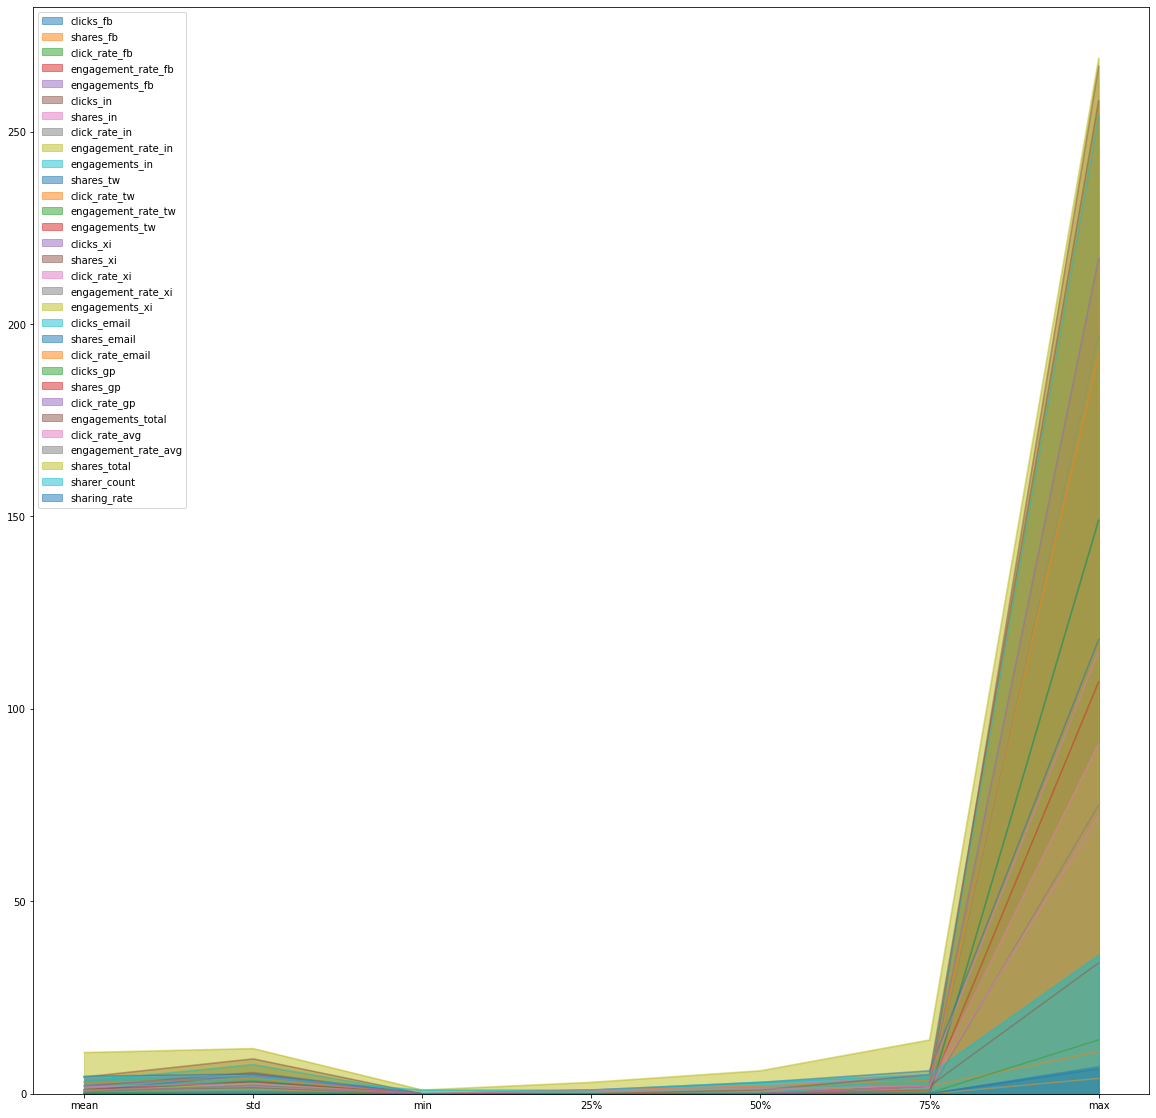

In [26]:
al = df2.describe().drop(index = 'count', columns = ['clicks_total','clicks_tw'])
plt.figure()
al.plot.area(stacked=False, figsize=(20,20))

clicks_fb              0.0000
shares_fb              1.0000
click_rate_fb          0.0000
engagement_rate_fb     0.0000
engagements_fb         0.0000
clicks_in              0.0000
shares_in              2.0000
click_rate_in          0.0000
engagement_rate_in     0.0000
engagements_in         0.0000
clicks_tw              6.0000
shares_tw              3.0000
click_rate_tw          2.0000
engagement_rate_tw     0.0000
engagements_tw         0.0000
clicks_xi              0.0000
shares_xi              0.0000
click_rate_xi          0.0000
engagement_rate_xi     0.0000
engagements_xi         0.0000
clicks_email           0.0000
shares_email           0.0000
click_rate_email       0.0000
clicks_gp              0.0000
shares_gp              0.0000
click_rate_gp          0.0000
clicks_total           9.0000
engagements_total      1.0000
click_rate_avg         1.3000
engagement_rate_avg    0.2000
shares_total           6.0000
sharer_count           3.0000
sharing_rate           0.0278
dtype: flo

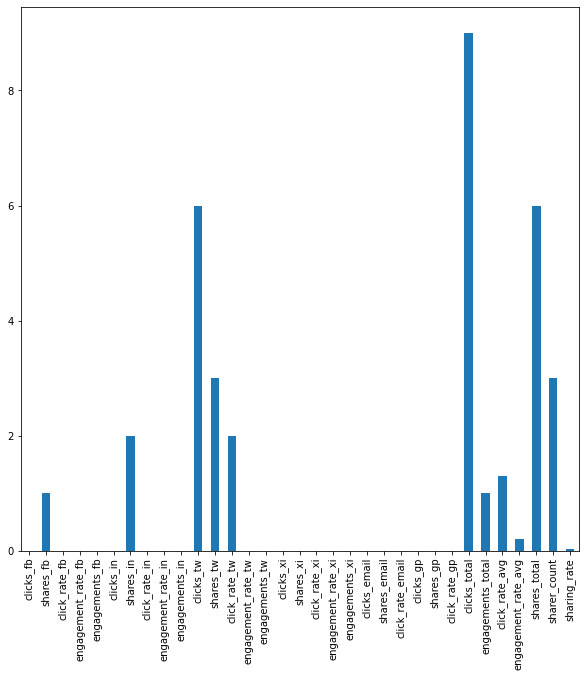

In [4]:
#нахождение медианы по столбцам таблицы
mn = df2.median()
plt.figure(figsize=(10,10))
mn.plot.bar()
df2.median()

clicks_fb               0.758058
shares_fb               0.950792
click_rate_fb           0.441865
engagement_rate_fb      0.000000
engagements_fb          0.000000
clicks_in               1.936391
shares_in               4.156018
click_rate_in           0.542953
engagement_rate_in      0.724099
engagements_in          3.227255
clicks_tw              15.323002
shares_tw               4.561892
click_rate_tw           2.846185
engagement_rate_tw      0.244669
engagements_tw          1.140950
clicks_xi               2.189395
shares_xi               1.043963
click_rate_xi           0.956714
engagement_rate_xi      0.000000
engagements_xi          0.000000
clicks_email            0.003242
shares_email            0.021076
click_rate_email        0.003052
clicks_gp               0.000000
shares_gp               0.000000
click_rate_gp           0.000000
clicks_total           20.210090
engagements_total       4.368205
click_rate_avg          1.863694
engagement_rate_avg     0.512817
shares_tot

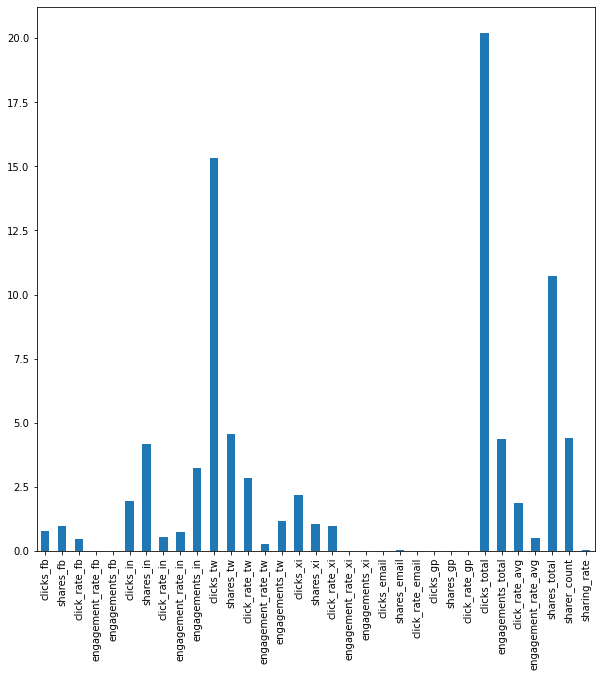

In [5]:
#нахождение среднего по столбцам таблицы
mn = df2.mean()
plt.figure(figsize=(10,10))
mn.plot.bar()
df2.mean()

clicks_fb               4.923595
shares_fb               1.205559
click_rate_fb           3.341166
engagement_rate_fb      0.000000
engagements_fb          0.000000
clicks_in               5.511444
shares_in               4.785178
click_rate_in           2.074960
engagement_rate_in      2.575696
engagements_in          7.603575
clicks_tw              50.029692
shares_tw               5.161311
click_rate_tw           3.990378
engagement_rate_tw      0.611358
engagements_tw          3.113245
clicks_xi               4.630824
shares_xi               1.589808
click_rate_xi           1.937251
engagement_rate_xi      0.000000
engagements_xi          0.000000
clicks_email            0.090508
shares_email            0.174246
click_rate_email        0.086197
clicks_gp               0.000000
shares_gp               0.000000
click_rate_gp           0.000000
clicks_total           52.673611
engagements_total       9.088802
click_rate_avg          2.669028
engagement_rate_avg     2.232113
shares_tot

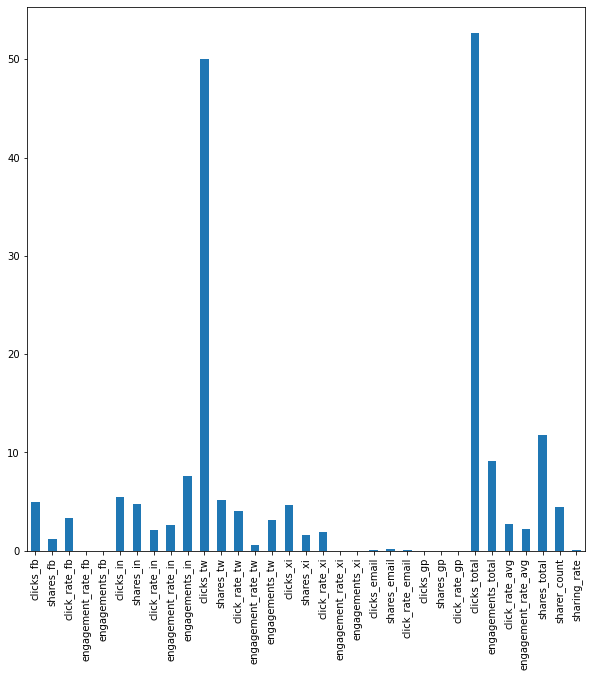

In [6]:
#нахождение стандартного отклонения по столбцам таблицы
mn = df2.std()
plt.figure(figsize=(10,10))
mn.plot.bar()
df2.std()

clicks_fb               149
shares_fb                11
click_rate_fb           149
engagement_rate_fb        0
engagements_fb            0
clicks_in               267
shares_in               115
click_rate_in            75
engagement_rate_in      197
engagements_in          254
clicks_tw              3977
shares_tw               118
click_rate_tw           192
engagement_rate_tw       14
engagements_tw          107
clicks_xi               217
shares_xi                34
click_rate_xi          72.3
engagement_rate_xi        0
engagements_xi            0
clicks_email              4
shares_email              7
click_rate_email          4
clicks_gp                 0
shares_gp                 0
click_rate_gp             0
clicks_total           4008
engagements_total       258
click_rate_avg           91
engagement_rate_avg     197
shares_total            269
sharer_count             36
sharing_rate            6.6
dtype: object

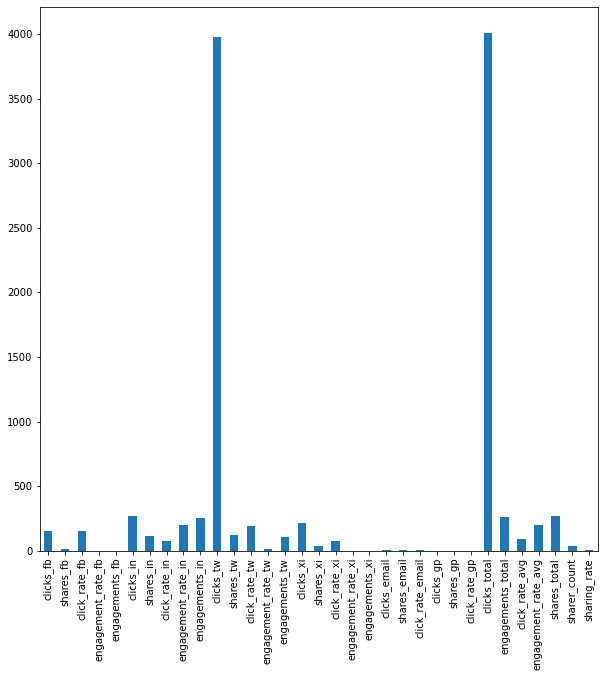

In [7]:
#нахождение максимума по столбцам таблицы
mx = df2.max().drop(index = ['approval_date_iso8601'])
plt.figure(figsize=(10,10))
mx.plot.bar()
mx

clicks_fb                   0
shares_fb                   0
click_rate_fb               0
engagement_rate_fb          0
engagements_fb              0
clicks_in                   0
shares_in                   0
click_rate_in               0
engagement_rate_in          0
engagements_in              0
clicks_tw                   0
shares_tw                   0
click_rate_tw               0
engagement_rate_tw          0
engagements_tw              0
clicks_xi                   0
shares_xi                   0
click_rate_xi               0
engagement_rate_xi          0
engagements_xi              0
clicks_email                0
shares_email                0
click_rate_email            0
clicks_gp                   0
shares_gp                   0
click_rate_gp               0
clicks_total                0
engagements_total           0
click_rate_avg              0
engagement_rate_avg         0
shares_total                1
sharer_count                1
sharing_rate           0.0024
dtype: obj

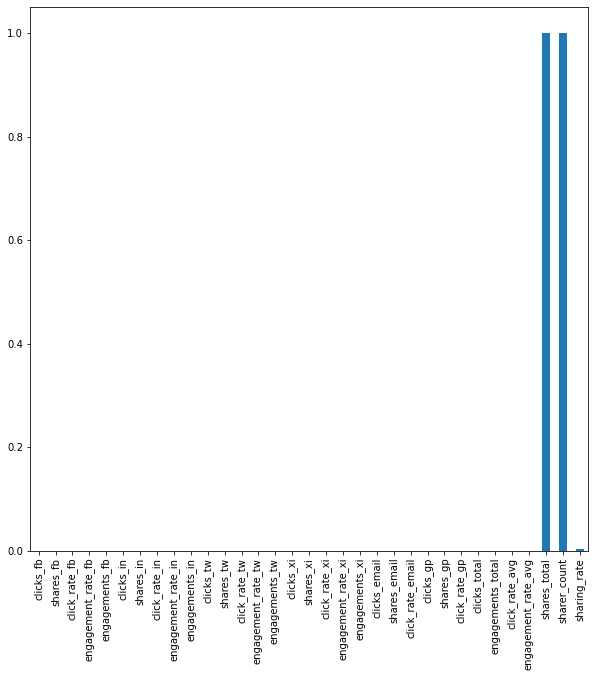

In [8]:
#нахождение минимума по столбцам таблицы
mn = df2.min().drop(index = ['approval_date_iso8601'])
plt.figure(figsize=(10,10))
mn.plot.bar()
mn

In [9]:
#топ10 человек, которыми были одобрены статьи
df["approved_by_name"].value_counts()[0:10]

Zoe Tan                1565
Hernan Diazgranados     507
Kristina Kiry           420
Michael Roesner         308
Daniela Incerti         197
Sergey Lurye            195
Alberto                 146
Sanjeev                 111
Mücahit Hoscan          106
David Buxton             94
Name: approved_by_name, dtype: int64

In [10]:
#топ10 человек, которые предложили данные статьи
df["suggested_by_name"].value_counts()[0:10]

Gayle Landry        397
Igor Akhmetov       115
Zoe Tan              65
Amin Shokri          48
Norma Pacheco        45
Gustavo Cols         44
Susi O'Neill         38
Jorge Pena           31
Olga Rodicheva       25
Ahmed Abdelghani     24
Name: suggested_by_name, dtype: int64